In [2]:
#Importamos las librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Cargamos el segundo DataFrame
dt = pd.read_csv('Datos_Toronto.csv')
dt = dt.drop(['Unnamed: 0'], axis=1)
dt.head(5)

C:\Users\Paulina\AppData\Local\Temp\ipykernel_23228\1296315536.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('Datos_Toronto.csv')


source                                    name host_name  \
0  previous scrape                                   Marco   IsmaÃ«l   
1  previous scrape          Sunny Little Portugal Bachelor    Alyson   
2  previous scrape      $950 / 1br - LARGE Beautiful Attic   Stephen   
3  previous scrape                          Sarahâ house   Natalia   
4  previous scrape  81-05/ private room on the main floor.    Maggie   

   host_since    host_location host_response_time host_is_superhost  \
0  04/06/2016  Toronto, Canada         Sin tiempo                 f   
1  26/08/2016  Toronto, Canada         Sin tiempo                 f   
2  20/06/2013  Toronto, Canada         Sin tiempo                 f   
3  10/04/2014  Toronto, Canada       within a day                 f   
4  11/07/2017  Toronto, Canada         Sin tiempo                 f   

  host_listings_count  host_verifications host_identity_verified  ...  \
0                 1.0  ['email', 'phone']                      f  ...   
1                 1.0           ['phone']                      f  ...   
2                 1.0  ['email', 'phone']                      t  ...   
3                 5.0  ['email', 'phone']                      t  ...   
4                 9.0  ['email', 'phone']                      t  ...   

  number_of_reviews_ltm number_of_reviews_l30d review_scores_rating  \
0                   0.0                    0.0                  4.9   
1                   0.0                    0.0                  4.9   
2                   0.0                    0.0                  4.9   
3                   0.0                    0.0                  4.9   
4                   0.0                    0.0                  4.9   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.75                       4.9                   4.9   
1                   4.75                       4.9                   4.9   
2                   4.75                       4.9                   4.9   
3                   4.75                       4.9                   4.9   
4                   4.75                       4.9                   4.9   

  review_scores_communication review_scores_location  review_scores_value  \
0                         5.0                    4.9                  4.7   
1                         5.0                    4.9                  4.7   
2                         5.0                    4.9                  4.7   
3                         5.0                    4.9                  4.7   
4                         5.0                    4.9                  4.7   

   reviews_per_month  
0               0.34  
1               0.34  
2               0.34  
3               0.34  
4               0.34  

[5 rows x 48 columns]

In [4]:
#Limitamos el DataFrame a las variables que vamos a usar 
f1 = dt.iloc[ : , [21, 6, 9, 11, 12, 17, 26, 27, 30, 42]]
f1

host_response_rate host_is_superhost host_identity_verified  \
0                    96.0                 f                      f   
1                    96.0                 f                      f   
2                    96.0                 f                      t   
3                   100.0                 f                      t   
4                    96.0                 f                      t   
...                   ...               ...                    ...   
21862               100.0                 t                      t   
21863                96.0                 f                      t   
21864               100.0                 f                      t   
21865               100.0                 t                      t   
21866                98.3                 f                      t   

                   property_type        room_type instant_bookable  \
0             Entire rental unit  Entire home/apt                f   
1             Entire rental unit  Entire home/apt                f   
2           Private room in loft     Private room                f   
3           Private room in home     Private room                f   
4           Private room in home     Private room                t   
...                          ...              ...              ...   
21862         Entire rental unit  Entire home/apt                f   
21863         Entire rental unit  Entire home/apt                f   
21864  Entire serviced apartment  Entire home/apt                t   
21865         Entire guest suite  Entire home/apt                t   
21866         Entire rental unit  Entire home/apt                f   

       accommodates  bathrooms   price  review_scores_cleanliness  
0               1.0      100.0  165.36                       4.90  
1               1.0      100.0  165.36                       4.90  
2               1.0      100.0  165.36                       4.90  
3               2.0      100.0  165.36                       4.90  
4               2.0      100.0  165.36                       4.90  
...             ...        ...     ...                        ...  
21862           1.0      100.0  165.36                       5.00  
21863           2.0      100.0  165.36                       5.00  
21864           5.0      100.0  165.36                       4.90  
21865           4.0      100.0  165.36                       4.89  
21866           3.0      100.0  165.36                       5.00  

[21867 rows x 10 columns]

In [5]:
#Caso especial para la variable "host_is_superhost"
f1['host_is_superhost'] = f1['host_is_superhost'].astype(str)
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
f1['host_is_superhost'] = pd.to_numeric(f1['host_is_superhost'], errors='coerce').fillna(0).astype(float)

#Caso especial para la variable "host_identity_verified"
f1['host_identity_verified'] = f1['host_identity_verified'].astype(str)
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0.0, 't': 1})
f1['host_identity_verified'] = pd.to_numeric(f1['host_identity_verified'], errors='coerce').fillna(0).astype(float)

C:\Users\Paulina\AppData\Local\Temp\ipykernel_23228\1373811180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].astype(str)
C:\Users\Paulina\AppData\Local\Temp\ipykernel_23228\1373811180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_23228\1373811180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [6]:
#Convertimos los booleanos a numéricos
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#Convertimos los string a numéricos
from sklearn.preprocessing import LabelEncoder   #importamos libreria 

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])
f1['property_type'] = f1['property_type'].astype(float)

#Hacemos un filtro para la variable "room_type"
f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\Paulina\AppData\Local\Temp\ipykernel_23228\1611080944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_23228\1611080944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_23228\1611080944.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [7]:
#Hacemos un DataFrame para cada categoria 
ft_1 = f1[(f1["room_type"] == 1)]              #ft_1 = Entire home/apt
ft_2 = f1[(f1["room_type"] == 2)]              #ft_2 = Private room
ft_3 = f1[(f1["room_type"] == 3)]              #ft_3 = Shared room
ft_4 = f1[(f1["room_type"] == 4)]              #ft_4 = Hotel room

-------------------------------DataFrame: Private room-------------------------------

In [8]:
#Obtenemos la información del DataFrame
ft_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 2 to 21860
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         7424 non-null   float64
 1   host_is_superhost          7424 non-null   float64
 2   host_identity_verified     7424 non-null   float64
 3   property_type              7424 non-null   float64
 4   room_type                  7424 non-null   int64  
 5   instant_bookable           7424 non-null   int64  
 6   accommodates               7424 non-null   float64
 7   bathrooms                  7424 non-null   float64
 8   price                      7424 non-null   float64
 9   review_scores_cleanliness  7424 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 638.0 KB


Grafico 1:

<Axes: xlabel='room_type', ylabel='price'>

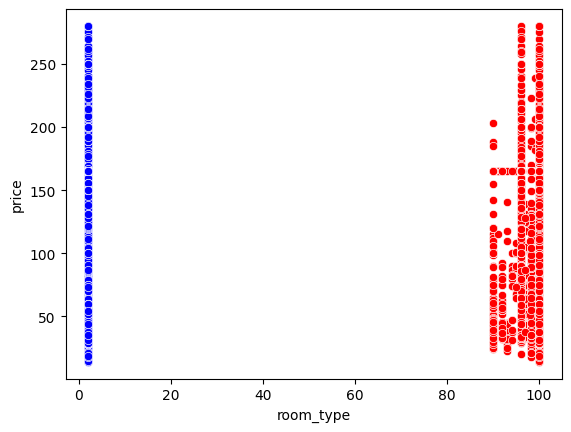

In [9]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=ft_2)

Grafico 2:

<Axes: xlabel='room_type', ylabel='price'>

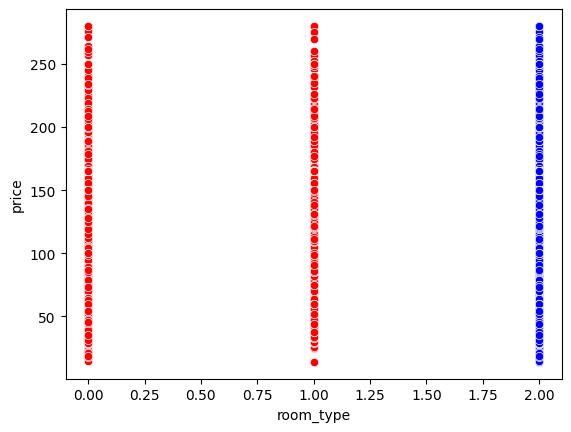

In [10]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=ft_2)

Grafico 3:

<Axes: xlabel='room_type', ylabel='price'>

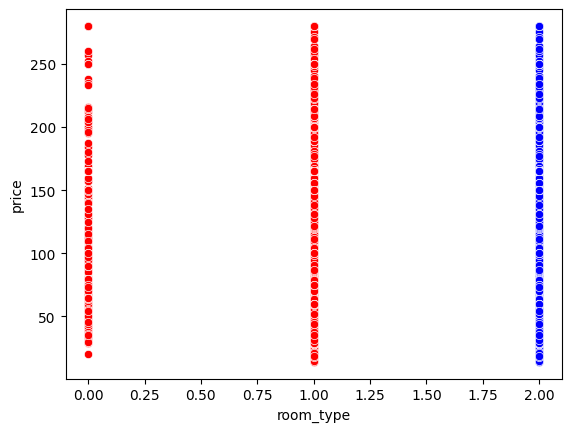

In [11]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=ft_2)

Grafico 4:

<Axes: xlabel='room_type', ylabel='price'>

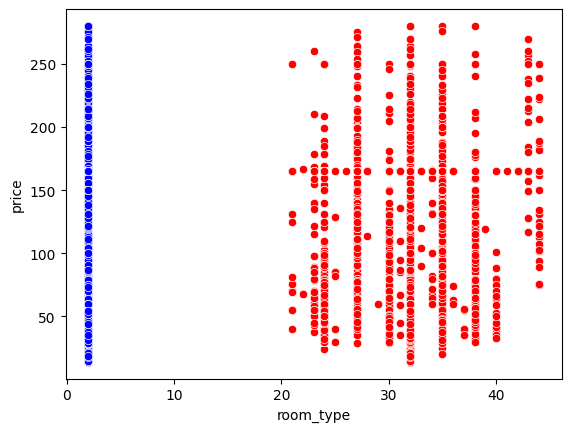

In [12]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='property_type', y='price', color='red', data=ft_2)

Grafico 5:

In [13]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='room_type', y='price', color='red', data=ft_2)

<Axes: xlabel='room_type', ylabel='price'>

Grafico 6:

In [14]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=ft_2)

<Axes: xlabel='room_type', ylabel='price'>

Grafico 7:

<Axes: xlabel='room_type', ylabel='price'>

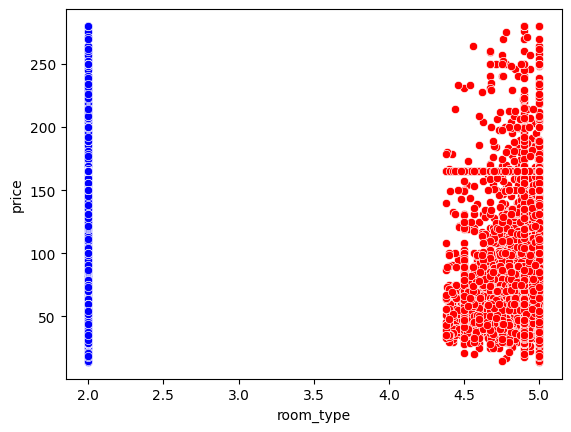

In [15]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=ft_2)

Grafico 8:

In [16]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=ft_2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=ft_2)

<Axes: xlabel='room_type', ylabel='accommodates'>

Declaramos las variables independientes y dependientes 

In [17]:
#declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep_T_1 = ft_2[['host_response_rate']]
Var_Dep_T_1 = ft_2['price']

In [19]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep_T_2 = ft_2[['host_is_superhost']]
Var_Indep_T_3 = ft_2[['room_type']]
Var_Indep_T_4 = ft_2[['host_identity_verified']]
Var_Indep_T_5 = ft_2[['property_type']]
Var_Indep_T_6 = ft_2[['instant_bookable']]
Var_Indep_T_7 = ft_2[['review_scores_cleanliness']]

In [20]:
#variables accommodates vs bathrooms
Var_Indep_T_8= ft_2[['bathrooms']]
Var_Dep_T_2 = ft_2['accommodates']

Definición del modelo 

In [21]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 

model_T_1 = LinearRegression()
model_T_2 = LinearRegression()
model_T_3 = LinearRegression()
model_T_4 = LinearRegression()
model_T_5 = LinearRegression()
model_T_6 = LinearRegression()
model_T_7 = LinearRegression()
model_T_8 = LinearRegression()

In [22]:
#ajustamos el modelo con las variables antes declaradas
model_T_1.fit(X = Var_Indep_T_1, y = Var_Dep_T_1)
model_T_2.fit(X = Var_Indep_T_2, y = Var_Dep_T_1)
model_T_3.fit(X = Var_Indep_T_3, y = Var_Dep_T_1)
model_T_4.fit(X = Var_Indep_T_4, y = Var_Dep_T_1)
model_T_5.fit(X = Var_Indep_T_5, y = Var_Dep_T_1)
model_T_6.fit(X = Var_Indep_T_6, y = Var_Dep_T_1)
model_T_7.fit(X = Var_Indep_T_7, y = Var_Dep_T_1)
model_T_8.fit(X = Var_Indep_T_8, y = Var_Dep_T_2)

LinearRegression()

Obtenemos el coeficiente para el modelo 1

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.44326483]),
 'rank_': 1,
 'singular_': array([202.42177352]),
 'intercept_': 634.627099924172}

In [24]:
#predecimos valores para el modelo matemático y=-5.44326483 + 634.627099924172
y_pred_T_1 = model_T_1.predict(X = ft_2[['host_response_rate']])
y_pred_T_1

array([112.0736765 ,  90.30061719, 112.0736765 , ...,  90.30061719,
        90.30061719, 112.0736765 ])

In [25]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(0, 'Predicciones_1', y_pred_T_1)
ft_2

Predicciones_1  host_response_rate  host_is_superhost  \
2          112.073676                96.0                0.0   
3           90.300617               100.0                0.0   
4          112.073676                96.0                0.0   
6          112.073676                96.0                0.0   
7          112.073676                96.0                0.0   
...               ...                 ...                ...   
21840       90.300617               100.0                0.0   
21848      112.073676                96.0                0.0   
21849       90.300617               100.0                1.0   
21857       90.300617               100.0                1.0   
21860      112.073676                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
2                         1.0           34.0          2                 0   
3                         1.0           32.0          2                 0   
4                         1.0           32.0          2                 1   
6                         0.0           32.0          2                 0   
7                         1.0           35.0          2                 0   
...                       ...            ...        ...               ...   
21840                     1.0           32.0          2                 0   
21848                     1.0           27.0          2                 1   
21849                     1.0           24.0          2                 0   
21857                     1.0           35.0          2                 0   
21860                     1.0           32.0          2                 1   

       accommodates  bathrooms   price  review_scores_cleanliness  
2               1.0      100.0  165.36                       4.90  
3               2.0      100.0  165.36                       4.90  
4               2.0      100.0  165.36                       4.90  
6               1.0        1.0  131.40                       4.90  
7               2.0        1.0  120.00                       4.75  
...             ...        ...     ...                        ...  
21840           2.0      100.0  165.36                       5.00  
21848           1.0      100.0  165.36                       5.00  
21849           1.0      100.0  165.36                       4.85  
21857           1.0      100.0  165.36                       4.48  
21860           2.0      100.0  165.36                       4.70  

[7424 rows x 11 columns]

Obtenemos el coeficiente para el modelo 2

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-21.69759319]),
 'rank_': 1,
 'singular_': array([41.09549827]),
 'intercept_': 107.57593037712367}

In [ ]:
#predecimos valores para el modelo matemático y=-21.69759319 + 107.57593037712367
y_pred_T_2 = model_T_2.predict(X = ft_2[['host_is_superhost']])
y_pred_T_2

array([107.57593038, 107.57593038, 107.57593038, ...,  85.87833718,
        85.87833718, 107.57593038])

In [28]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(1, 'Predicciones_2', y_pred_T_2)
ft_2

Predicciones_1  Predicciones_2  host_response_rate  host_is_superhost  \
2          112.073676      107.575930                96.0                0.0   
3           90.300617      107.575930               100.0                0.0   
4          112.073676      107.575930                96.0                0.0   
6          112.073676      107.575930                96.0                0.0   
7          112.073676      107.575930                96.0                0.0   
...               ...             ...                 ...                ...   
21840       90.300617      107.575930               100.0                0.0   
21848      112.073676      107.575930                96.0                0.0   
21849       90.300617       85.878337               100.0                1.0   
21857       90.300617       85.878337               100.0                1.0   
21860      112.073676      107.575930                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
2                         1.0           34.0          2                 0   
3                         1.0           32.0          2                 0   
4                         1.0           32.0          2                 1   
6                         0.0           32.0          2                 0   
7                         1.0           35.0          2                 0   
...                       ...            ...        ...               ...   
21840                     1.0           32.0          2                 0   
21848                     1.0           27.0          2                 1   
21849                     1.0           24.0          2                 0   
21857                     1.0           35.0          2                 0   
21860                     1.0           32.0          2                 1   

       accommodates  bathrooms   price  review_scores_cleanliness  
2               1.0      100.0  165.36                       4.90  
3               2.0      100.0  165.36                       4.90  
4               2.0      100.0  165.36                       4.90  
6               1.0        1.0  131.40                       4.90  
7               2.0        1.0  120.00                       4.75  
...             ...        ...     ...                        ...  
21840           2.0      100.0  165.36                       5.00  
21848           1.0      100.0  165.36                       5.00  
21849           1.0      100.0  165.36                       4.85  
21857           1.0      100.0  165.36                       4.48  
21860           2.0      100.0  165.36                       4.70  

[7424 rows x 12 columns]

Obtenemos el coeficiente para el modelo 3

In [29]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 99.98294181034484}

In [ ]:
#predecimos valores para el modelo matemático y=0 + 99.98294181034484
y_pred_T_3 = model_T_3.predict(X = ft_2[['room_type']])
y_pred_T_3

array([99.98294181, 99.98294181, 99.98294181, ..., 99.98294181,
       99.98294181, 99.98294181])

In [31]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(2, 'Predicciones_3', y_pred_T_3)
ft_2

Predicciones_1  Predicciones_2  Predicciones_3  host_response_rate  \
2          112.073676      107.575930       99.982942                96.0   
3           90.300617      107.575930       99.982942               100.0   
4          112.073676      107.575930       99.982942                96.0   
6          112.073676      107.575930       99.982942                96.0   
7          112.073676      107.575930       99.982942                96.0   
...               ...             ...             ...                 ...   
21840       90.300617      107.575930       99.982942               100.0   
21848      112.073676      107.575930       99.982942                96.0   
21849       90.300617       85.878337       99.982942               100.0   
21857       90.300617       85.878337       99.982942               100.0   
21860      112.073676      107.575930       99.982942                96.0   

       host_is_superhost  host_identity_verified  property_type  room_type  \
2                    0.0                     1.0           34.0          2   
3                    0.0                     1.0           32.0          2   
4                    0.0                     1.0           32.0          2   
6                    0.0                     0.0           32.0          2   
7                    0.0                     1.0           35.0          2   
...                  ...                     ...            ...        ...   
21840                0.0                     1.0           32.0          2   
21848                0.0                     1.0           27.0          2   
21849                1.0                     1.0           24.0          2   
21857                1.0                     1.0           35.0          2   
21860                0.0                     1.0           32.0          2   

       instant_bookable  accommodates  bathrooms   price  \
2                     0           1.0      100.0  165.36   
3                     0           2.0      100.0  165.36   
4                     1           2.0      100.0  165.36   
6                     0           1.0        1.0  131.40   
7                     0           2.0        1.0  120.00   
...                 ...           ...        ...     ...   
21840                 0           2.0      100.0  165.36   
21848                 1           1.0      100.0  165.36   
21849                 0           1.0      100.0  165.36   
21857                 0           1.0      100.0  165.36   
21860                 1           2.0      100.0  165.36   

       review_scores_cleanliness  
2                           4.90  
3                           4.90  
4                           4.90  
6                           4.90  
7                           4.75  
...                          ...  
21840                       5.00  
21848                       5.00  
21849                       4.85  
21857                       4.48  
21860                       4.70  

[7424 rows x 13 columns]

Obtenemos el coeficiente para el modelo 4

In [32]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-35.67191088]),
 'rank_': 1,
 'singular_': array([27.69983963]),
 'intercept_': 131.47935558112744}

In [33]:
#predecimos valores para el modelo matemático y=-35.67191088 + 131.47935558112744
y_pred_T_4 = model_T_4.predict(X = ft_2[['host_identity_verified']])
y_pred_T_4

array([95.8074447, 95.8074447, 95.8074447, ..., 95.8074447, 95.8074447,
       95.8074447])

In [34]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(3, 'Predicciones_4', y_pred_T_4)
ft_2

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
2          112.073676      107.575930       99.982942       95.807445   
3           90.300617      107.575930       99.982942       95.807445   
4          112.073676      107.575930       99.982942       95.807445   
6          112.073676      107.575930       99.982942      131.479356   
7          112.073676      107.575930       99.982942       95.807445   
...               ...             ...             ...             ...   
21840       90.300617      107.575930       99.982942       95.807445   
21848      112.073676      107.575930       99.982942       95.807445   
21849       90.300617       85.878337       99.982942       95.807445   
21857       90.300617       85.878337       99.982942       95.807445   
21860      112.073676      107.575930       99.982942       95.807445   

       host_response_rate  host_is_superhost  host_identity_verified  \
2                    96.0                0.0                     1.0   
3                   100.0                0.0                     1.0   
4                    96.0                0.0                     1.0   
6                    96.0                0.0                     0.0   
7                    96.0                0.0                     1.0   
...                   ...                ...                     ...   
21840               100.0                0.0                     1.0   
21848                96.0                0.0                     1.0   
21849               100.0                1.0                     1.0   
21857               100.0                1.0                     1.0   
21860                96.0                0.0                     1.0   

       property_type  room_type  instant_bookable  accommodates  bathrooms  \
2               34.0          2                 0           1.0      100.0   
3               32.0          2                 0           2.0      100.0   
4               32.0          2                 1           2.0      100.0   
6               32.0          2                 0           1.0        1.0   
7               35.0          2                 0           2.0        1.0   
...              ...        ...               ...           ...        ...   
21840           32.0          2                 0           2.0      100.0   
21848           27.0          2                 1           1.0      100.0   
21849           24.0          2                 0           1.0      100.0   
21857           35.0          2                 0           1.0      100.0   
21860           32.0          2                 1           2.0      100.0   

        price  review_scores_cleanliness  
2      165.36                       4.90  
3      165.36                       4.90  
4      165.36                       4.90  
6      131.40                       4.90  
7      120.00                       4.75  
...       ...                        ...  
21840  165.36                       5.00  
21848  165.36                       5.00  
21849  165.36                       4.85  
21857  165.36                       4.48  
21860  165.36                       4.70  

[7424 rows x 14 columns]

Obtenemos el coeficiente para el modelo 5

In [35]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.6808474]),
 'rank_': 1,
 'singular_': array([283.29504936]),
 'intercept_': 78.10750917773277}

In [36]:
#predecimos valores para el modelo matemático y=0.6808474 + 78.10750917773277
y_pred_T_5 = model_T_5.predict(X = ft_2[['property_type']])
y_pred_T_5

array([101.25632088,  99.89462607,  99.89462607, ...,  94.44784685,
       101.93716828,  99.89462607])

In [37]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(4, 'Predicciones_5', y_pred_T_5)
ft_2

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
2          112.073676      107.575930       99.982942       95.807445   
3           90.300617      107.575930       99.982942       95.807445   
4          112.073676      107.575930       99.982942       95.807445   
6          112.073676      107.575930       99.982942      131.479356   
7          112.073676      107.575930       99.982942       95.807445   
...               ...             ...             ...             ...   
21840       90.300617      107.575930       99.982942       95.807445   
21848      112.073676      107.575930       99.982942       95.807445   
21849       90.300617       85.878337       99.982942       95.807445   
21857       90.300617       85.878337       99.982942       95.807445   
21860      112.073676      107.575930       99.982942       95.807445   

       Predicciones_5  host_response_rate  host_is_superhost  \
2          101.256321                96.0                0.0   
3           99.894626               100.0                0.0   
4           99.894626                96.0                0.0   
6           99.894626                96.0                0.0   
7          101.937168                96.0                0.0   
...               ...                 ...                ...   
21840       99.894626               100.0                0.0   
21848       96.490389                96.0                0.0   
21849       94.447847               100.0                1.0   
21857      101.937168               100.0                1.0   
21860       99.894626                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
2                         1.0           34.0          2                 0   
3                         1.0           32.0          2                 0   
4                         1.0           32.0          2                 1   
6                         0.0           32.0          2                 0   
7                         1.0           35.0          2                 0   
...                       ...            ...        ...               ...   
21840                     1.0           32.0          2                 0   
21848                     1.0           27.0          2                 1   
21849                     1.0           24.0          2                 0   
21857                     1.0           35.0          2                 0   
21860                     1.0           32.0          2                 1   

       accommodates  bathrooms   price  review_scores_cleanliness  
2               1.0      100.0  165.36                       4.90  
3               2.0      100.0  165.36                       4.90  
4               2.0      100.0  165.36                       4.90  
6               1.0        1.0  131.40                       4.90  
7               2.0        1.0  120.00                       4.75  
...             ...        ...     ...                        ...  
21840           2.0      100.0  165.36                       5.00  
21848           1.0      100.0  165.36                       5.00  
21849           1.0      100.0  165.36                       4.85  
21857           1.0      100.0  165.36                       4.48  
21860           2.0      100.0  165.36                       4.70  

[7424 rows x 15 columns]

Obtenemos el coeficiente para el modelo 6

In [38]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.48122446]),
 'rank_': 1,
 'singular_': array([34.44937682]),
 'intercept_': 99.68705605116985}

In [ ]:
#predecimos valores para el modelo matemático y=1.48122446 + 99.68705605116985
y_pred_T_6 = model_T_6.predict(X = ft_2[['instant_bookable']])
y_pred_T_6

array([ 99.68705605,  99.68705605, 101.16828051, ...,  99.68705605,
        99.68705605, 101.16828051])

In [40]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(5, 'Predicciones_6', y_pred_T_6)
ft_2

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
2          112.073676      107.575930       99.982942       95.807445   
3           90.300617      107.575930       99.982942       95.807445   
4          112.073676      107.575930       99.982942       95.807445   
6          112.073676      107.575930       99.982942      131.479356   
7          112.073676      107.575930       99.982942       95.807445   
...               ...             ...             ...             ...   
21840       90.300617      107.575930       99.982942       95.807445   
21848      112.073676      107.575930       99.982942       95.807445   
21849       90.300617       85.878337       99.982942       95.807445   
21857       90.300617       85.878337       99.982942       95.807445   
21860      112.073676      107.575930       99.982942       95.807445   

       Predicciones_5  Predicciones_6  host_response_rate  host_is_superhost  \
2          101.256321       99.687056                96.0                0.0   
3           99.894626       99.687056               100.0                0.0   
4           99.894626      101.168281                96.0                0.0   
6           99.894626       99.687056                96.0                0.0   
7          101.937168       99.687056                96.0                0.0   
...               ...             ...                 ...                ...   
21840       99.894626       99.687056               100.0                0.0   
21848       96.490389      101.168281                96.0                0.0   
21849       94.447847       99.687056               100.0                1.0   
21857      101.937168       99.687056               100.0                1.0   
21860       99.894626      101.168281                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
2                         1.0           34.0          2                 0   
3                         1.0           32.0          2                 0   
4                         1.0           32.0          2                 1   
6                         0.0           32.0          2                 0   
7                         1.0           35.0          2                 0   
...                       ...            ...        ...               ...   
21840                     1.0           32.0          2                 0   
21848                     1.0           27.0          2                 1   
21849                     1.0           24.0          2                 0   
21857                     1.0           35.0          2                 0   
21860                     1.0           32.0          2                 1   

       accommodates  bathrooms   price  review_scores_cleanliness  
2               1.0      100.0  165.36                       4.90  
3               2.0      100.0  165.36                       4.90  
4               2.0      100.0  165.36                       4.90  
6               1.0        1.0  131.40                       4.90  
7               2.0        1.0  120.00                       4.75  
...             ...        ...     ...                        ...  
21840           2.0      100.0  165.36                       5.00  
21848           1.0      100.0  165.36                       5.00  
21849           1.0      100.0  165.36                       4.85  
21857           1.0      100.0  165.36                       4.48  
21860           2.0      100.0  165.36                       4.70  

[7424 rows x 16 columns]

Obtenemos el coeficiente el modelo 7

In [41]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([24.25481903]),
 'rank_': 1,
 'singular_': array([11.55411869]),
 'intercept_': -18.062785940058774}

In [42]:
#predecimos valores para el modelo matemático y=24.254819036 + (-18.062785940058774)
y_pred_T_7 = model_T_7.predict(X = ft_2[['review_scores_cleanliness']])
y_pred_T_7

array([100.78582729, 100.78582729, 100.78582729, ...,  99.57308634,
        90.5988033 ,  95.93486348])

In [43]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(6, 'Predicciones_7', y_pred_T_7)
ft_2

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
2          112.073676      107.575930       99.982942       95.807445   
3           90.300617      107.575930       99.982942       95.807445   
4          112.073676      107.575930       99.982942       95.807445   
6          112.073676      107.575930       99.982942      131.479356   
7          112.073676      107.575930       99.982942       95.807445   
...               ...             ...             ...             ...   
21840       90.300617      107.575930       99.982942       95.807445   
21848      112.073676      107.575930       99.982942       95.807445   
21849       90.300617       85.878337       99.982942       95.807445   
21857       90.300617       85.878337       99.982942       95.807445   
21860      112.073676      107.575930       99.982942       95.807445   

       Predicciones_5  Predicciones_6  Predicciones_7  host_response_rate  \
2          101.256321       99.687056      100.785827                96.0   
3           99.894626       99.687056      100.785827               100.0   
4           99.894626      101.168281      100.785827                96.0   
6           99.894626       99.687056      100.785827                96.0   
7          101.937168       99.687056       97.147604                96.0   
...               ...             ...             ...                 ...   
21840       99.894626       99.687056      103.211309               100.0   
21848       96.490389      101.168281      103.211309                96.0   
21849       94.447847       99.687056       99.573086               100.0   
21857      101.937168       99.687056       90.598803               100.0   
21860       99.894626      101.168281       95.934863                96.0   

       host_is_superhost  host_identity_verified  property_type  room_type  \
2                    0.0                     1.0           34.0          2   
3                    0.0                     1.0           32.0          2   
4                    0.0                     1.0           32.0          2   
6                    0.0                     0.0           32.0          2   
7                    0.0                     1.0           35.0          2   
...                  ...                     ...            ...        ...   
21840                0.0                     1.0           32.0          2   
21848                0.0                     1.0           27.0          2   
21849                1.0                     1.0           24.0          2   
21857                1.0                     1.0           35.0          2   
21860                0.0                     1.0           32.0          2   

       instant_bookable  accommodates  bathrooms   price  \
2                     0           1.0      100.0  165.36   
3                     0           2.0      100.0  165.36   
4                     1           2.0      100.0  165.36   
6                     0           1.0        1.0  131.40   
7                     0           2.0        1.0  120.00   
...                 ...           ...        ...     ...   
21840                 0           2.0      100.0  165.36   
21848                 1           1.0      100.0  165.36   
21849                 0           1.0      100.0  165.36   
21857                 0           1.0      100.0  165.36   
21860                 1           2.0      100.0  165.36   

       review_scores_cleanliness  
2                           4.90  
3                           4.90  
4                           4.90  
6                           4.90  
7                           4.75  
...                          ...  
21840                       5.00  
21848                       5.00  
21849                       4.85  
21857                       4.48  
21860                       4.70  

[7424 rows x 17 columns]

Obtenemos el coeficiente para el modelo 8

In [44]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model_T_8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00079326]),
 'rank_': 1,
 'singular_': array([3764.41459748]),
 'intercept_': 1.9124811314507317}

In [ ]:
#predecimos valores para el modelo matemático y=-0.00079326 + 1.9124811314507317
y_pred_T_8 = model_T_8.predict(X = ft_2[['bathrooms']])
y_pred_T_8

array([1.83315561, 1.83315561, 1.83315561, ..., 1.83315561, 1.83315561,
       1.83315561])

In [46]:
#insertamos la columna de predicciones en el DataFrame 
ft_2.insert(7, 'Predicciones_8', y_pred_T_8)
ft_2

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
2          112.073676      107.575930       99.982942       95.807445   
3           90.300617      107.575930       99.982942       95.807445   
4          112.073676      107.575930       99.982942       95.807445   
6          112.073676      107.575930       99.982942      131.479356   
7          112.073676      107.575930       99.982942       95.807445   
...               ...             ...             ...             ...   
21840       90.300617      107.575930       99.982942       95.807445   
21848      112.073676      107.575930       99.982942       95.807445   
21849       90.300617       85.878337       99.982942       95.807445   
21857       90.300617       85.878337       99.982942       95.807445   
21860      112.073676      107.575930       99.982942       95.807445   

       Predicciones_5  Predicciones_6  Predicciones_7  Predicciones_8  \
2          101.256321       99.687056      100.785827        1.833156   
3           99.894626       99.687056      100.785827        1.833156   
4           99.894626      101.168281      100.785827        1.833156   
6           99.894626       99.687056      100.785827        1.911688   
7          101.937168       99.687056       97.147604        1.911688   
...               ...             ...             ...             ...   
21840       99.894626       99.687056      103.211309        1.833156   
21848       96.490389      101.168281      103.211309        1.833156   
21849       94.447847       99.687056       99.573086        1.833156   
21857      101.937168       99.687056       90.598803        1.833156   
21860       99.894626      101.168281       95.934863        1.833156   

       host_response_rate  host_is_superhost  host_identity_verified  \
2                    96.0                0.0                     1.0   
3                   100.0                0.0                     1.0   
4                    96.0                0.0                     1.0   
6                    96.0                0.0                     0.0   
7                    96.0                0.0                     1.0   
...                   ...                ...                     ...   
21840               100.0                0.0                     1.0   
21848                96.0                0.0                     1.0   
21849               100.0                1.0                     1.0   
21857               100.0                1.0                     1.0   
21860                96.0                0.0                     1.0   

       property_type  room_type  instant_bookable  accommodates  bathrooms  \
2               34.0          2                 0           1.0      100.0   
3               32.0          2                 0           2.0      100.0   
4               32.0          2                 1           2.0      100.0   
6               32.0          2                 0           1.0        1.0   
7               35.0          2                 0           2.0        1.0   
...              ...        ...               ...           ...        ...   
21840           32.0          2                 0           2.0      100.0   
21848           27.0          2                 1           1.0      100.0   
21849           24.0          2                 0           1.0      100.0   
21857           35.0          2                 0           1.0      100.0   
21860           32.0          2                 1           2.0      100.0   

        price  review_scores_cleanliness  
2      165.36                       4.90  
3      165.36                       4.90  
4      165.36                       4.90  
6      131.40                       4.90  
7      120.00                       4.75  
...       ...                        ...  
21840  165.36                       5.00  
21848  165.36                       5.00  
21849  165.36                       4.85  
21857  165.36        

Graficas comparativas 

Grafico 1:

<Axes: xlabel='host_response_rate', ylabel='price'>

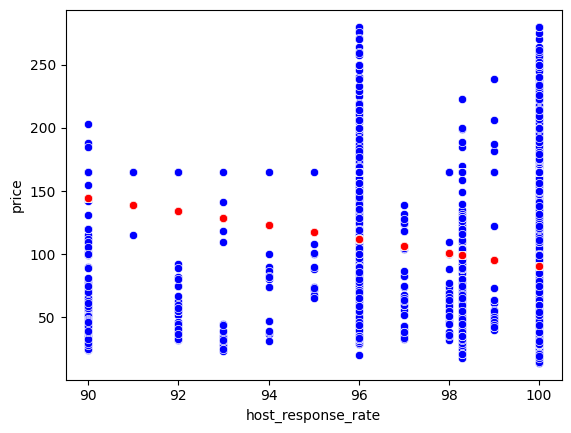

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=ft_2)
sns.scatterplot(x='host_response_rate', y='Predicciones_1', color='red', data=ft_2)

Grafico 2:

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=ft_2)
sns.scatterplot(x='host_is_superhost', y='Predicciones_2', color='red', data=ft_2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

Grafico 3:

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='room_type', y='Predicciones_3', color='red', data=ft_2)

<Axes: xlabel='room_type', ylabel='price'>

Grafico 4:

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=ft_2)
sns.scatterplot(x='host_identity_verified', y='Predicciones_4', color='red', data=ft_2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

Grafico 5:

<Axes: xlabel='property_type', ylabel='price'>

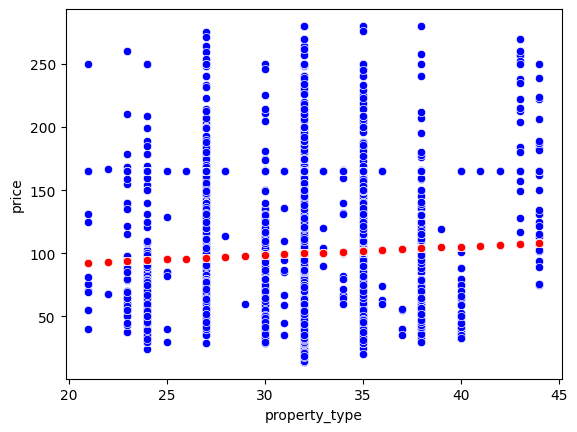

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=ft_2)
sns.scatterplot(x='property_type', y='Predicciones_5', color='red', data=ft_2)

Grafico 6:

<Axes: xlabel='instant_bookable', ylabel='price'>

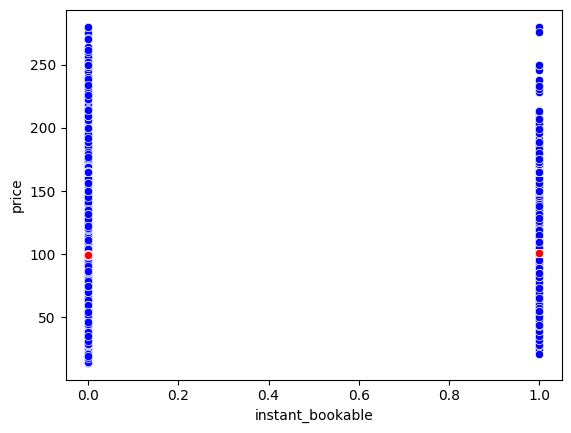

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=ft_2)
sns.scatterplot(x='instant_bookable', y='Predicciones_6', color='red', data=ft_2)

Grafico 7:

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

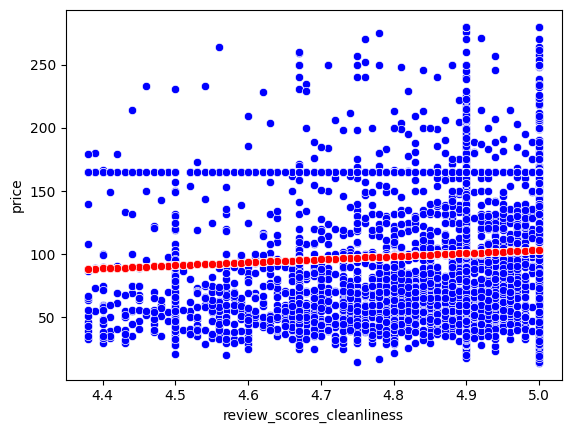

In [53]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=ft_2)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_7', color='red', data=ft_2)

Grafico 8:

In [54]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=ft_2)
sns.scatterplot(x='bathrooms', y='Predicciones_8', color='red', data=ft_2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

Obtenemos los coeficientes de determinación 

In [55]:
#Modelo 1
coef_Deter_T_1 = model_T_1.score(X = Var_Indep_T_1, y = Var_Dep_T_1)
coef_Deter_T_1

0.057047485400548936

In [56]:
#Modelo 2
coef_Deter_T_2 = model_T_2.score(X = Var_Indep_T_2, y = Var_Dep_T_1)
coef_Deter_T_2

0.03736067826550915

In [57]:
#Modelo 3
coef_Deter_T_3 = model_T_3.score(X = Var_Indep_T_3, y = Var_Dep_T_1)
coef_Deter_T_3

0.0

In [58]:
#Modelo 4
coef_Deter_T_4 = model_T_4.score(X = Var_Indep_T_4, y = Var_Dep_T_1)
coef_Deter_T_4

0.04587862401382359

In [59]:
#Modelo 5
coef_Deter_T_5 = model_T_5.score(X = Var_Indep_T_5, y = Var_Dep_T_1)
coef_Deter_T_5

0.0017481579393944235

In [60]:
#Modelo 6
coef_Deter_T_6 = model_T_6.score(X = Var_Indep_T_6, y = Var_Dep_T_1)
coef_Deter_T_6

0.00012235102648283647

In [61]:
#Modelo 7
coef_Deter_T_7 = model_T_7.score(X = Var_Indep_T_7, y = Var_Dep_T_1)
coef_Deter_T_7

0.0036903949895632504

In [62]:
#Modelo 8
coef_Deter_T_8 = model_T_8.score(X = Var_Indep_T_8, y = Var_Dep_T_2)
coef_Deter_T_8

0.0013310864768709685

Obtenemos los coeficientes de correlación 

In [63]:
#Modelo 1
coef_Correl_T_1 = np.sqrt(coef_Deter_T_1)
coef_Correl_T_1

0.2388461542511182

In [64]:
#Modelo 2
coef_Correl_T_2 = np.sqrt(coef_Deter_T_2)
coef_Correl_T_2

0.19328910539787064

In [65]:
#Modelo 3
coef_Correl_T_3 = np.sqrt(coef_Deter_T_3)
coef_Correl_T_3

0.0

In [67]:
#Modelo 4
coef_Correl_T_4 = np.sqrt(coef_Deter_T_4)
coef_Correl_T_4

0.2141929597671772

In [68]:
#Modelo 5
coef_Correl_T_5 = np.sqrt(coef_Deter_T_5)
coef_Correl_T_5

0.041810978694529786

In [69]:
#Modelo 6
coef_Correl_T_6 = np.sqrt(coef_Deter_T_6)
coef_Correl_T_6

0.011061239825753551

In [70]:
#Modelo 7
coef_Correl_T_7 = np.sqrt(coef_Deter_T_7)
coef_Correl_T_7

0.06074862129763317

In [71]:
#Modelo 8
coef_Correl_T_8 = np.sqrt(coef_Deter_T_8)
coef_Correl_T_8

0.03648405784546133

Graficamos todas las dispersiones entre todas las variables

c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

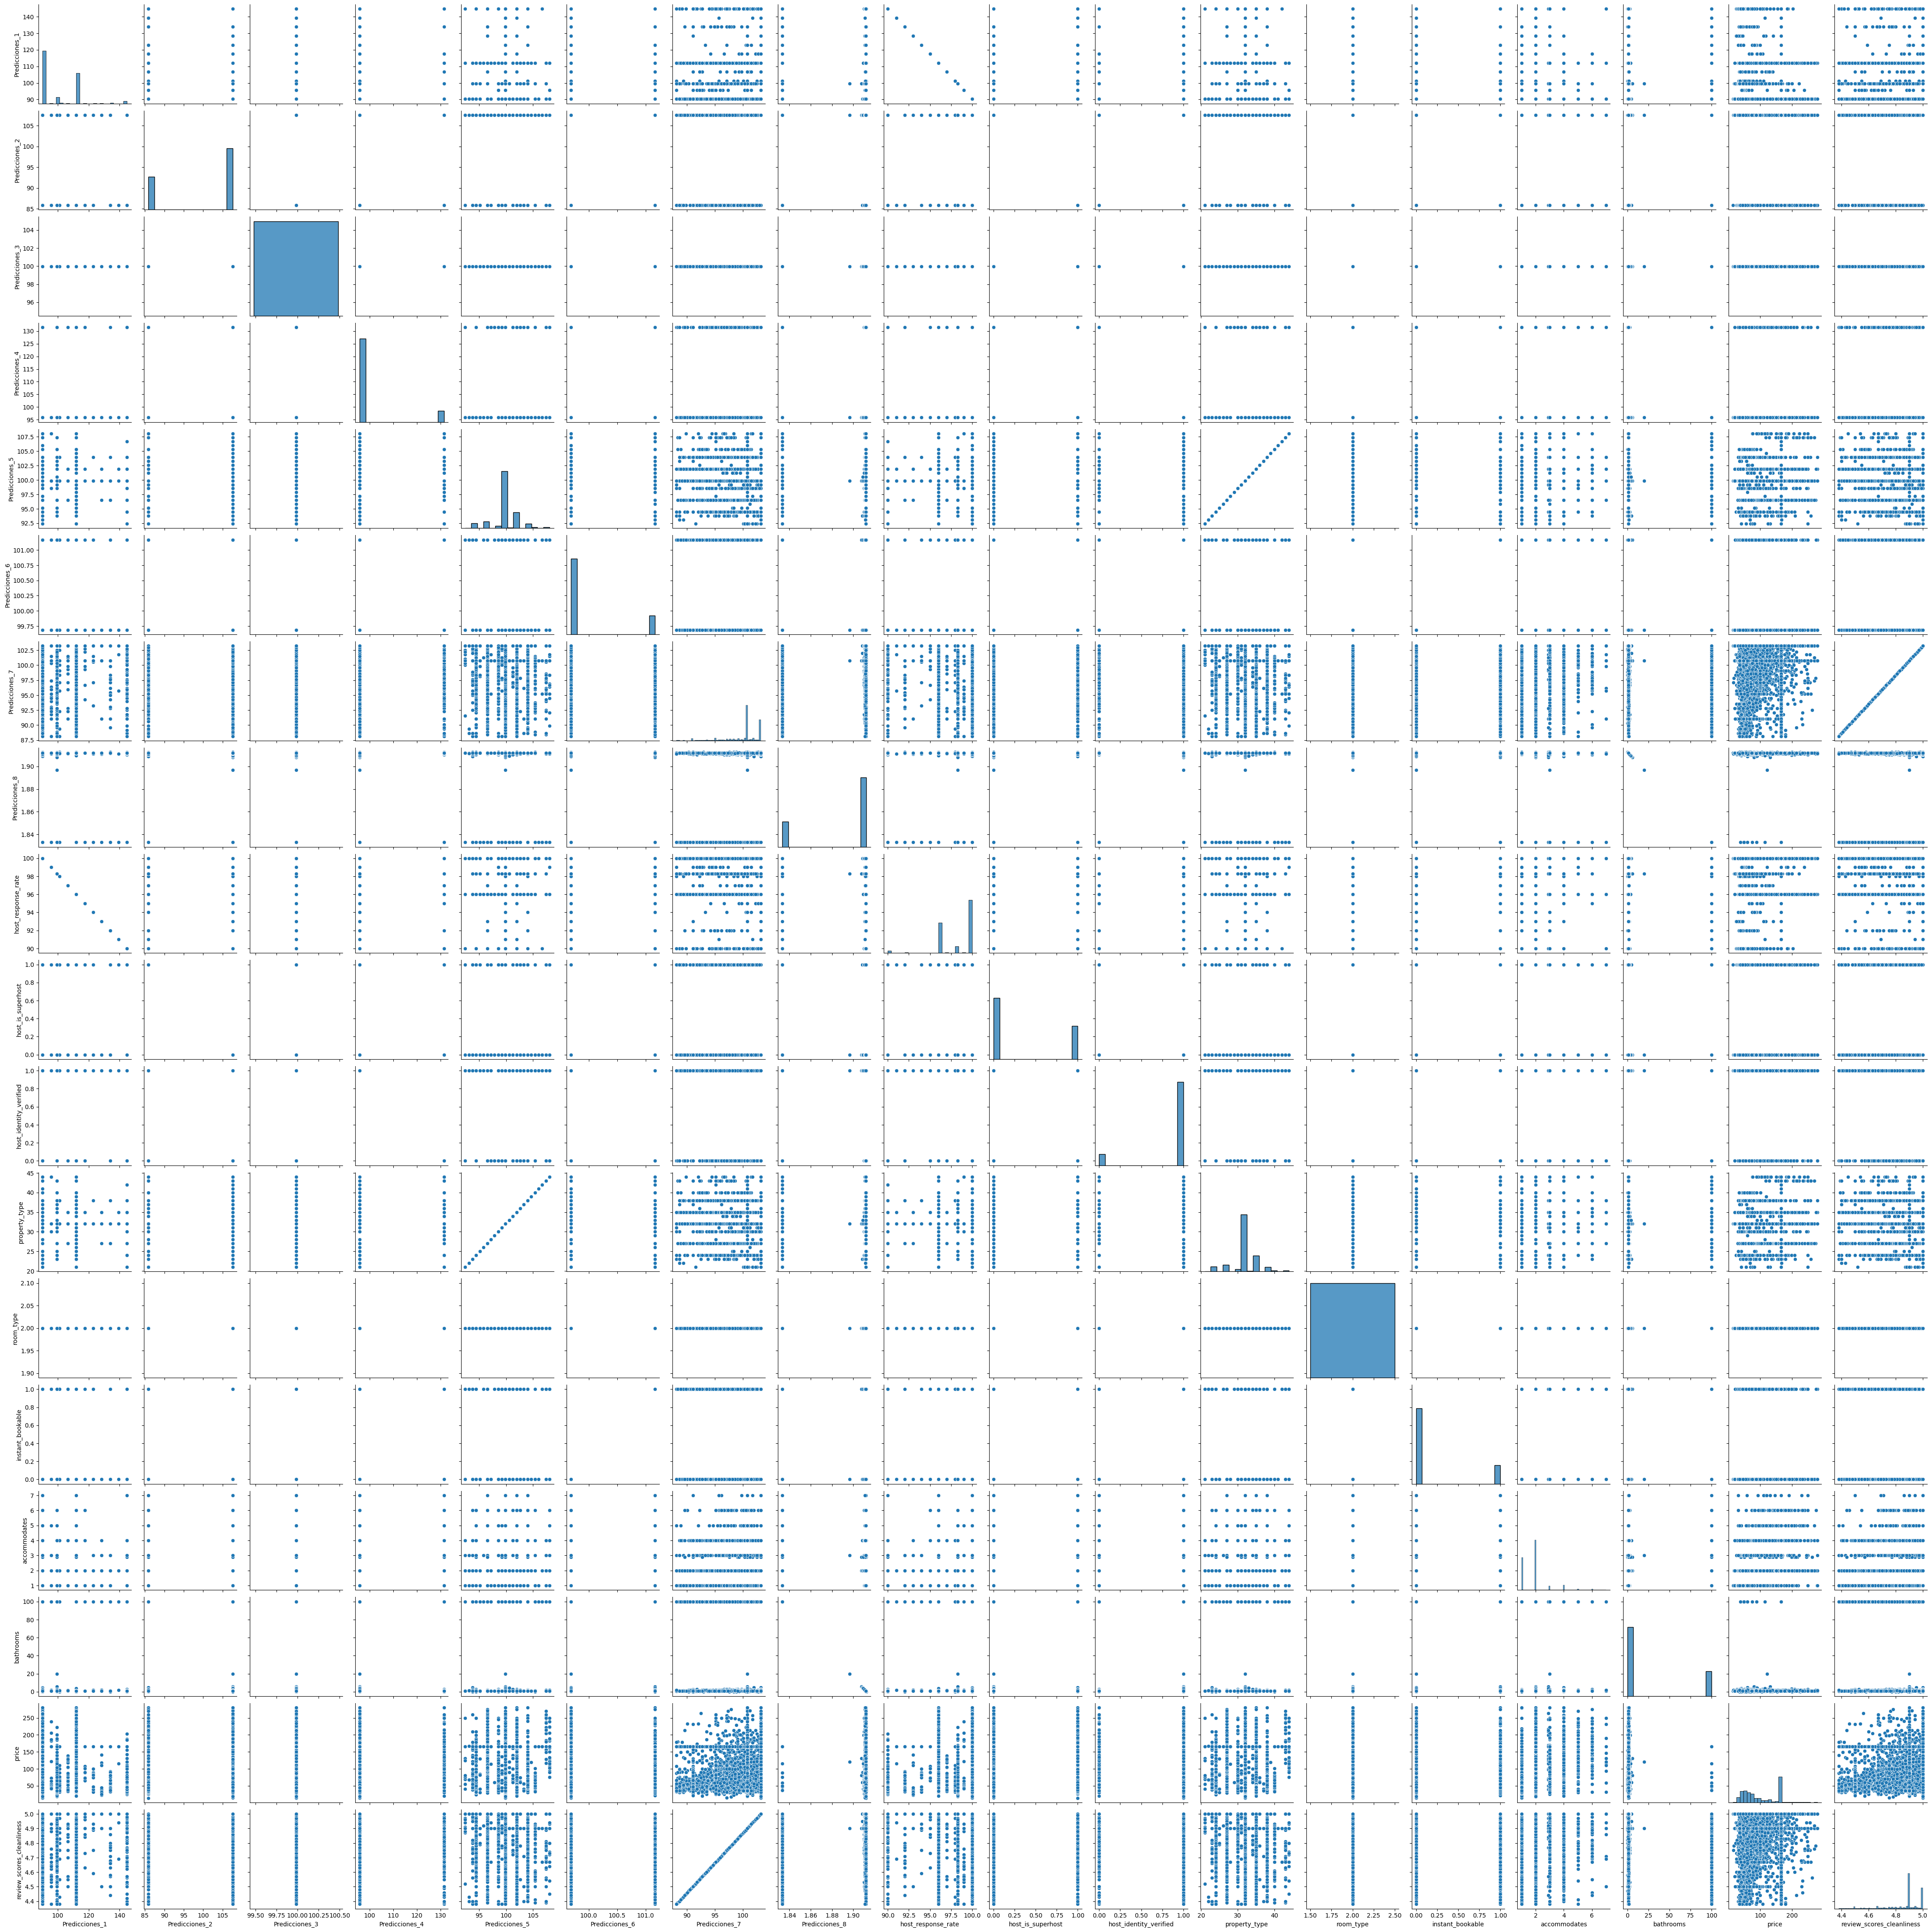

In [76]:
sns.pairplot(ft_2)

Encontramos todas las correlaciones 

In [72]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors_T_1 = ft_2.corr()
Corr_Factors_T_1

Predicciones_1  Predicciones_2  Predicciones_3  \
Predicciones_1                   1.000000        0.408944             NaN   
Predicciones_2                   0.408944        1.000000             NaN   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   0.190073        0.181056             NaN   
Predicciones_5                   0.028955        0.066654             NaN   
Predicciones_6                  -0.049721        0.054368             NaN   
Predicciones_7                   0.034376       -0.030178             NaN   
Predicciones_8                  -0.314576       -0.267950             NaN   
host_response_rate              -1.000000       -0.408944             NaN   
host_is_superhost               -0.408944       -1.000000             NaN   
host_identity_verified          -0.190073       -0.181056             NaN   
property_type                    0.028955        0.066654             NaN   
room_type                             NaN             NaN             NaN   
instant_bookable                -0.049721        0.054368             NaN   
accommodates                    -0.078737       -0.017871             NaN   
bathrooms                        0.314576        0.267950             NaN   
price                            0.238846        0.193289             NaN   
review_scores_cleanliness        0.034376       -0.030178             NaN   

                           Predicciones_4  Predicciones_5  Predicciones_6  \
Predicciones_1                   0.190073        0.028955       -0.049721   
Predicciones_2                   0.181056        0.066654        0.054368   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   1.000000        0.081465       -0.048823   
Predicciones_5                   0.081465        1.000000        0.029268   
Predicciones_6                  -0.048823        0.029268        1.000000   
Predicciones_7                   0.041043       -0.027228       -0.036127   
Predicciones_8                  -0.246291       -0.034757        0.004245   
host_response_rate              -0.190073       -0.028955        0.049721   
host_is_superhost               -0.181056       -0.066654       -0.054368   
host_identity_verified          -1.000000       -0.081465        0.048823   
property_type                    0.081465        1.000000        0.029268   
room_type                             NaN             NaN             NaN   
instant_bookable                -0.048823        0.029268        1.000000   
accommodates                    -0.023657        0.015959        0.053611   
bathrooms                        0.246291        0.034757       -0.004245   
price                            0.214193        0.041811        0.011061   
review_scores_cleanliness        0.041043       -0.027228       -0.036127   

                           Predicciones_7  Predicciones_8  host_response_rate  \
Predicciones_1                   0.034376       -0.314576           -1.000000   
Predicciones_2                  -0.030178       -0.267950           -0.408944   
Predicciones_3                        NaN             NaN                 NaN   
Predicciones_4                   0.041043       -0.246291           -0.190073   
Predicciones_5                  -0.027228       -0.034757           -0.028955   
Predicciones_6                  -0.036127        0.004245            0.049721   
Predicciones_7                   1.000000       -0.021562           -0.034376   
Predicciones_8                  -0.021562        1.000000            0.314576   
host_response_rate              -0.034376        0.314576            1.000000   
host_is_superhost                0.030178        0.267950            0.408944   
host_identity_verified          -0.041043        0.246291            0.190073   
property_type                   -0.027228       -0.034757           -0.028955   
room_type                             NaN     

In [73]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors_T_2 = abs(Corr_Factors_T_1)
Corr_Factors_T_2

Predicciones_1  Predicciones_2  Predicciones_3  \
Predicciones_1                   1.000000        0.408944             NaN   
Predicciones_2                   0.408944        1.000000             NaN   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   0.190073        0.181056             NaN   
Predicciones_5                   0.028955        0.066654             NaN   
Predicciones_6                   0.049721        0.054368             NaN   
Predicciones_7                   0.034376        0.030178             NaN   
Predicciones_8                   0.314576        0.267950             NaN   
host_response_rate               1.000000        0.408944             NaN   
host_is_superhost                0.408944        1.000000             NaN   
host_identity_verified           0.190073        0.181056             NaN   
property_type                    0.028955        0.066654             NaN   
room_type                             NaN             NaN             NaN   
instant_bookable                 0.049721        0.054368             NaN   
accommodates                     0.078737        0.017871             NaN   
bathrooms                        0.314576        0.267950             NaN   
price                            0.238846        0.193289             NaN   
review_scores_cleanliness        0.034376        0.030178             NaN   

                           Predicciones_4  Predicciones_5  Predicciones_6  \
Predicciones_1                   0.190073        0.028955        0.049721   
Predicciones_2                   0.181056        0.066654        0.054368   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   1.000000        0.081465        0.048823   
Predicciones_5                   0.081465        1.000000        0.029268   
Predicciones_6                   0.048823        0.029268        1.000000   
Predicciones_7                   0.041043        0.027228        0.036127   
Predicciones_8                   0.246291        0.034757        0.004245   
host_response_rate               0.190073        0.028955        0.049721   
host_is_superhost                0.181056        0.066654        0.054368   
host_identity_verified           1.000000        0.081465        0.048823   
property_type                    0.081465        1.000000        0.029268   
room_type                             NaN             NaN             NaN   
instant_bookable                 0.048823        0.029268        1.000000   
accommodates                     0.023657        0.015959        0.053611   
bathrooms                        0.246291        0.034757        0.004245   
price                            0.214193        0.041811        0.011061   
review_scores_cleanliness        0.041043        0.027228        0.036127   

                           Predicciones_7  Predicciones_8  host_response_rate  \
Predicciones_1                   0.034376        0.314576            1.000000   
Predicciones_2                   0.030178        0.267950            0.408944   
Predicciones_3                        NaN             NaN                 NaN   
Predicciones_4                   0.041043        0.246291            0.190073   
Predicciones_5                   0.027228        0.034757            0.028955   
Predicciones_6                   0.036127        0.004245            0.049721   
Predicciones_7                   1.000000        0.021562            0.034376   
Predicciones_8                   0.021562        1.000000            0.314576   
host_response_rate               0.034376        0.314576            1.000000   
host_is_superhost                0.030178        0.267950            0.408944   
host_identity_verified           0.041043        0.246291            0.190073   
property_type                    0.027228        0.034757            0.028955   
room_type                             NaN     

<Axes: >

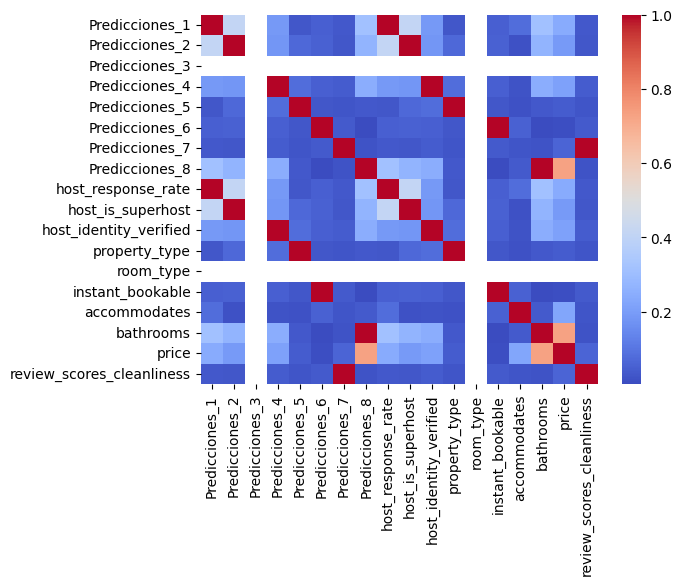

In [74]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap_T_2 = sns.heatmap(Corr_Factors_T_2, cmap= 'coolwarm')
Heart_Nap_T_2

c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

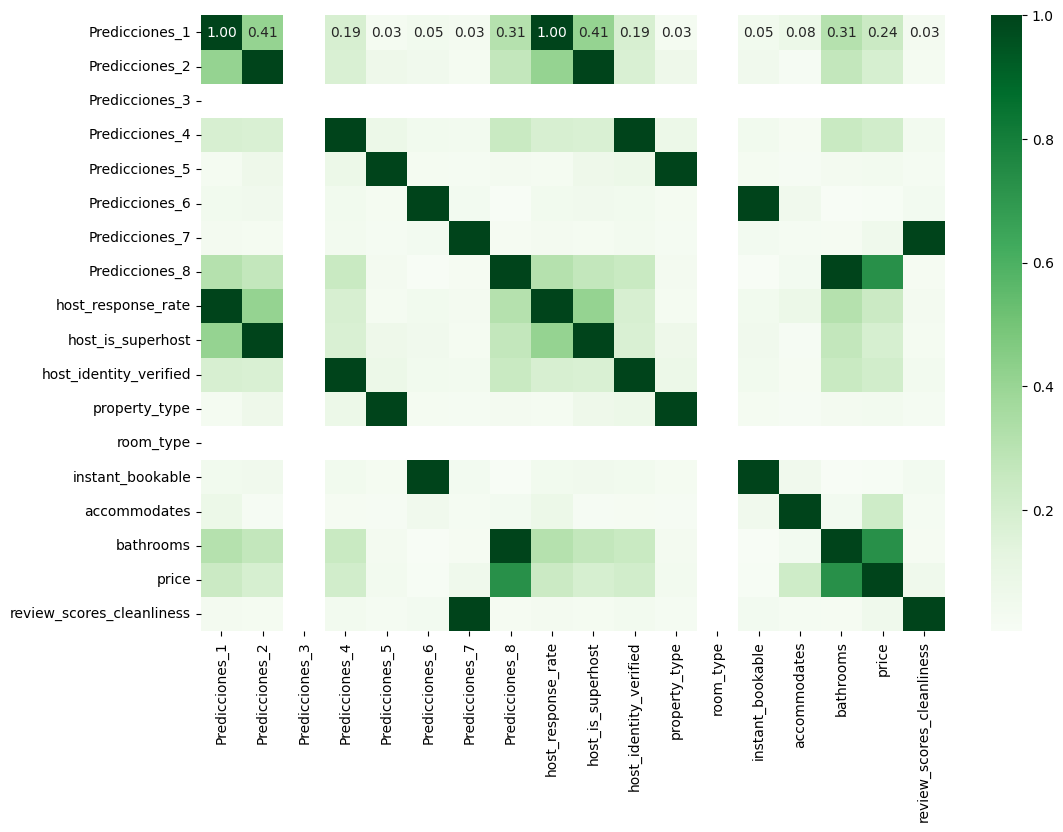

In [75]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap_T_2 = sns.heatmap(Corr_Factors_T_2, cmap= 'Greens', annot=True, fmt=".2f")
Heart_Nap_T_2